In [2]:
import pandas as pd
import numpy as np
#from scipy.stats import loguniform
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression, BayesianRidge, ElasticNetCV, BayesianRidge, Ridge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, RepeatedKFold, train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import  KFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, StandardScaler

In [6]:
import pickle

In [3]:
file = 'Admission_Predict_Ver1.1.csv'

In [4]:
data = pd.read_csv(file)

In [5]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


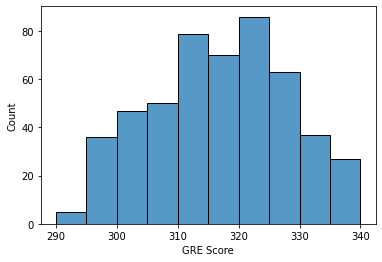

In [ ]:
sns.histplot(data, x='GRE Score', bins=10)

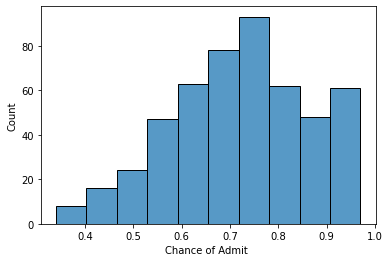

In [ ]:
sns.histplot(data, x='Chance of Admit ', bins=10)

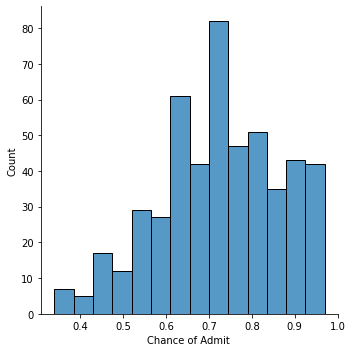

In [ ]:
sns.displot(data, x='Chance of Admit ')

In [7]:
new_df = data[['GRE Score', 'TOEFL Score', 'CGPA', 'Research', 'Chance of Admit ']].copy()

In [8]:
new_df.head()

,GRE Score,TOEFL Score,CGPA,Research,Chance of Admit
0,337,118,9.65,1,0.92
1,324,107,8.87,1,0.76
2,316,104,8.00,1,0.72
3,322,110,8.67,1,0.80
4,314,103,8.21,0,0.65


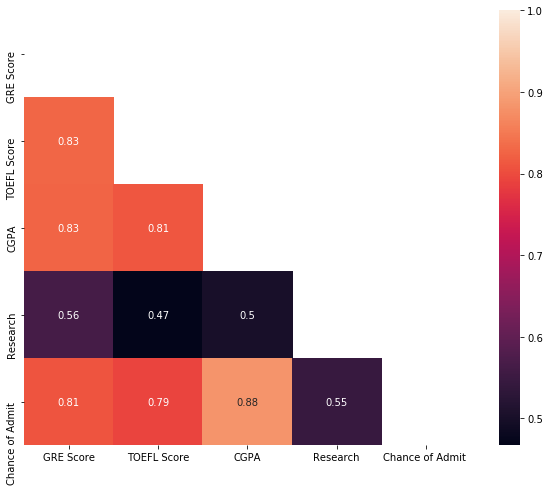

In [9]:
plt.figure(figsize=(10, 8))
corr = new_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, cbar=True, mask=mask, )

In [10]:
new_df.dtypes

GRE Score             int64
TOEFL Score           int64
CGPA                float64
Research              int64
Chance of Admit     float64
dtype: object

In [11]:
x = new_df.drop('Chance of Admit ', axis=1)
y = new_df['Chance of Admit ']

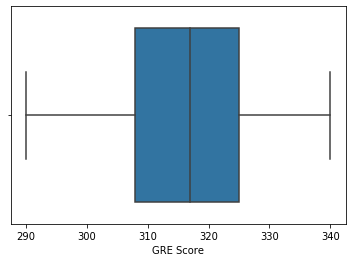

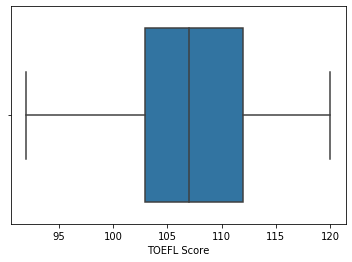

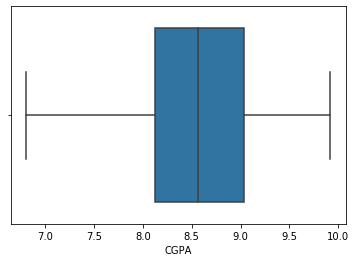

In [12]:
cols = x.columns.values.tolist()

for col in cols:
  if col == 'Research':
    pass
  else:
    sns.boxplot(x=x[col])
    plt.show()

In [13]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.boxplot(data=x[['GRE Score', 'TOEFL Score', 'CGPA']], orient="h", palette="Set2")

AttributeError: module 'seaborn' has no attribute 'set_theme'

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2020)

In [15]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [16]:
model = BayesianRidge()
model.fit(x_train_scaled, y_train)

BayesianRidge()

In [17]:
y_preds = model.predict(x_test_scaled)

In [18]:
np.sqrt(mean_squared_error(y_test, y_preds))

0.056138263334576936

In [19]:
r2_score(y_true=y_test, y_pred=y_preds)

0.8350324930172335

In [20]:
y_test.head()

499    0.84
424    0.91
288    0.82
234    0.91
496    0.96
Name: Chance of Admit , dtype: float64

In [21]:
x_test.head()

,GRE Score,TOEFL Score,CGPA,Research
499,327,113,9.04,0
424,325,114,9.46,1
288,314,104,9.02,0
234,330,113,9.31,1
496,337,117,9.87,1


In [ ]:
values = [337, 118, 9.65, 1]
vec = scaler.transform(np.asarray(pd.Series(values)).reshape(1, -1))
model.predict(vec)

array([0.95415601])

In [22]:
model = LinearRegression()

model.fit(x_train_scaled, y_train)

y_preds = model.predict(x_test_scaled)

print(f'rmse {np.sqrt(mean_squared_error(y_test, y_preds))}')

print(f'goodness of fit {r2_score(y_true=y_test, y_pred=y_preds)}')

values = [325, 114, 9.46, 1]
vec = scaler.transform(np.asarray(pd.Series(values)).reshape(1, -1))
model.predict(vec)

rmse 0.05608173846446675
goodness of fit 0.835364532943628


array([0.8912112])

In [23]:
model.coef_

array([0.02147899, 0.02162757, 0.08377773, 0.01051147])

In [24]:
weights = list(model.coef_)
weights

[0.021478993810189386,
 0.021627574776575342,
 0.08377773205630093,
 0.010511472633874516]

In [26]:
pickle.dump(model,open('model.pkl', 'wb'))